<a href="https://colab.research.google.com/github/ThisGuy245/ThisGuy245/blob/main/LabOne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thommy's New Notebook for Colab!**

1 - 2D transformations
2 - 3D transformations: 1
1 - Triangle
2 - Circle
3 - Square: 1
Enter coordinates for point 1 (x,y): -1, -1
Enter coordinates for point 2 (x,y): 60, 10
Enter coordinates for point 3 (x,y): -20, 30


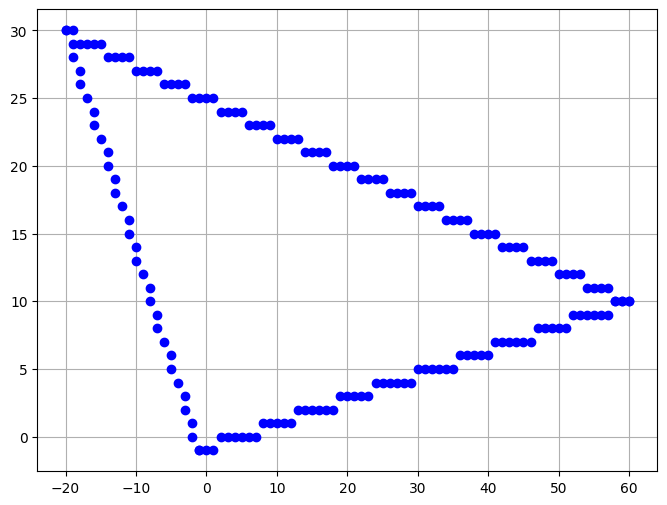

In [27]:
# Required library imports
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, sqrt
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting

# Bresenham's algorithm for line drawing
def bresenham(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            plt.plot(x, y, 'bo')
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            plt.plot(x, y, 'bo')
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    plt.plot(x, y, 'bo')

# Drawing a circle using Midpoint Circle Algorithm
def draw_circle(xc, yc, r):
    x = r
    y = 0
    p = 1 - r
    while x > y:
        y += 1
        if p <= 0:
            p = p + 2 * y + 1
        else:
            x -= 1
            p = p + 2 * y - 2 * x + 1
        if x < y:
            break
        plt.plot(xc + x, yc + y, 'bo')
        plt.plot(xc - x, yc + y, 'bo')
        plt.plot(xc + x, yc - y, 'bo')
        plt.plot(xc - x, yc - y, 'bo')
        if x != y:
            plt.plot(xc + y, yc + x, 'bo')
            plt.plot(xc - y, yc + x, 'bo')
            plt.plot(xc + y, yc - x, 'bo')
            plt.plot(xc - y, yc - x, 'bo')
            plt.plot





# Drawing a square using simple line-drawing logic
def draw_square(xc, yc, side):
    half_side = side // 2
    bresenham(xc - half_side, yc - half_side, xc + half_side, yc - half_side)
    bresenham(xc + half_side, yc - half_side, xc + half_side, yc + half_side)
    bresenham(xc + half_side, yc + half_side, xc - half_side, yc + half_side)
    bresenham(xc - half_side, yc + half_side, xc - half_side, yc - half_side)

# Rotation functions for 3D transformations
def rotate_x(point, angle):
    rad = radians(angle)
    rot_matrix = np.array([[1, 0, 0],
                           [0, cos(rad), -sin(rad)],
                           [0, sin(rad), cos(rad)]])
    return np.dot(rot_matrix, point)

def rotate_y(point, angle):
    rad = radians(angle)
    rot_matrix = np.array([[cos(rad), 0, sin(rad)],
                           [0, 1, 0],
                           [-sin(rad), 0, cos(rad)]])
    return np.dot(rot_matrix, point)

def rotate_z(point, angle):
    rad = radians(angle)
    rot_matrix = np.array([[cos(rad), -sin(rad), 0],
                           [sin(rad), cos(rad), 0],
                           [0, 0, 1]])
    return np.dot(rot_matrix, point)

# Main program function
def main():
    choice = input("1 - 2D transformations\n2 - 3D transformations: ").strip()
    if choice == '1':
        shape = input("1 - Triangle\n2 - Circle\n3 - Square: ").strip()
        if shape == '1':  # Triangle
            points = [tuple(map(int, input(f"Enter coordinates for point {i+1} (x,y): ").split(','))) for i in range(3)]
            plt.figure(figsize=(8, 6))
            for i in range(3):
                start = points[i]
                end = points[(i + 1) % 3]
                bresenham(start[0], start[1], end[0], end[1])
        elif shape == '2':  # Circle
            xc, yc, r = map(int, input("Enter center (x, y) and radius r: ").split(','))
            plt.figure(figsize=(8, 8))
            draw_circle(xc, yc, r)
        elif shape == '3':  # Square
            xc, yc, side = map(int, input("Enter center (x, y) and side length: ").split(','))
            plt.figure(figsize=(8, 8))
            draw_square(xc, yc, side)
        #plt.xlim(20,100)  TEST LIMITS
        #plt.ylim(20,100)  TEST LIMITS
        plt.grid(True)
        plt.show()

    elif choice == '2':
        point = np.array(list(map(int, input("Enter coordinates for the initial point (x,y,z): ").split(','))))
        transformations = input("Enter transformations sequence (e.g., 'x 30, y 90, z 45'): ")
        transformations = transformations.split(', ')
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(*point, color='r', label='Initial Position')
        for trans in transformations:
            axis, angle = trans.split(' ')
            if axis == 'x':
                point = rotate_x(point, int(angle))
            elif axis == 'y':
                point = rotate_y(point, int(angle))
            elif axis == 'z':
                point = rotate_z(point, int(angle))
            ax.scatter(*point, label=f'After {axis.upper()}-axis Rotation {angle}°')
        ax.legend()
        ax.set_xlim([-30, 30])
        ax.set_ylim([-30, 30])
        ax.set_zlim([-30, 30])
        ax.set_xlabels("x")
        ax.set_ylabels("y")
        ax.set_zlabels("z")
        plt.show()

    else:
        print("Invalid choice. Please enter '1' or '2'.")

# Ensuring the main function is called when the script is executed
if __name__ == "__main__":
    main()
